# **Steps**
1. Data exploration
2. converted categorical feautures into numeric ones
3. built a classifier to predict survival
4. evaluated the models performance in a classification report


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/SL_ML/LE_3_

/content/drive/My Drive/Colab Notebooks/SL_ML/LE_3_


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
#lOADING THE DATASETS
df_train = pd.read_csv('train.csv')

In [ ]:
#WE see that the dataset - 'train' has 891 rows and 12 colmns
df_train.shape

(891, 12)

In [ ]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#checking the counts on the most rrelevant columns
df_train.Survived.value_counts()
#df_train['Survived'].value_counts() the same

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#droppping irrelevant columns
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
#we need to deal withg the missing values in the Age variable
#we would be using assinging values based on the passenger classes 
def age_approx(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [ ]:
#embarked has 2 missing values
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
#dropping off all remsining missing values
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
##checing data types of variables we find out that variables Sex and Embark are categorical data
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#using get_dummies to convert categorical data to indicator/dummy
df_train_dummied = pd.get_dummies(df_train_dummied, columns=['Sex'])

KeyError: ignored

In [ ]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=['Embarked'])

In [ ]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


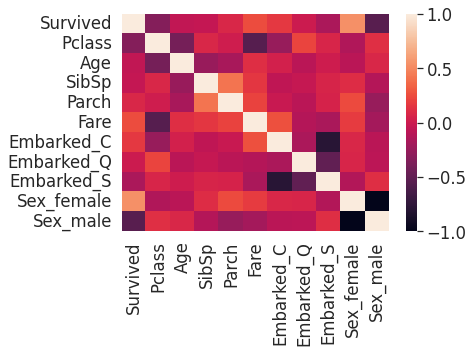

In [ ]:
#finding out if variables are correlated
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [ ]:
#we notivce there is a storng correlation among survied and Sex_female
#now lets build a classifier which can predict durvival
#creating train and test datasets using X and y variables

used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = df_train_dummied[used_features]
y = df_train_dummied['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = LogReg.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]])

out of the 161 actua instances of not survived the classifier predicted currectly 143 of them, and out of the 106 actual instances of survived the classifier predicted 83 of them

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

In [ ]:
len(X_test)

267

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [ ]:
LogReg.coef_

array([[-1.0372797 , -0.03936799, -0.23976182, -0.03958848,  1.19402482,
        -1.19408376,  0.35174141, -0.0381814 , -0.31361894]])

In [ ]:
LogReg.intercept_

array([3.62670309])

In [ ]:
#we can further check out algorithms predicted probabilities by using X_test values
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
LogReg.predict_proba(X_test)

array([[0.26594352, 0.73405648],
       [0.39542568, 0.60457432],
       [0.94697464, 0.05302536],
       [0.26099188, 0.73900812],
       [0.94385191, 0.05614809],
       [0.13561622, 0.86438378],
       [0.33477958, 0.66522042],
       [0.51899142, 0.48100858],
       [0.78178253, 0.21821747],
       [0.40812977, 0.59187023],
       [0.73965007, 0.26034993],
       [0.21208251, 0.78791749],
       [0.71102979, 0.28897021],
       [0.14729635, 0.85270365],
       [0.8651727 , 0.1348273 ],
       [0.37070953, 0.62929047],
       [0.89270956, 0.10729044],
       [0.2977929 , 0.7022071 ],
       [0.17641931, 0.82358069],
       [0.40010789, 0.59989211],
       [0.9048758 , 0.0951242 ],
       [0.55502049, 0.44497951],
       [0.86398336, 0.13601664],
       [0.93725477, 0.06274523],
       [0.51595617, 0.48404383],
       [0.51533161, 0.48466839],
       [0.03953019, 0.96046981],
       [0.86969927, 0.13030073],
       [0.89820453, 0.10179547],
       [0.32610042, 0.67389958],
       [0.

the first column is the probability that the entry has not survived the label and the second column is the probability that the entry has survvied the label